['healthyPT', 'PT Injury m3', 'PT Injury m2', 'PT prolif', 'PT Injury m4', 'PT Injury m1']
Categories (6, object): ['PT Injury m1', 'PT Injury m2', 'PT Injury m3', 'PT Injury m4', 'PT prolif', 'healthyPT']


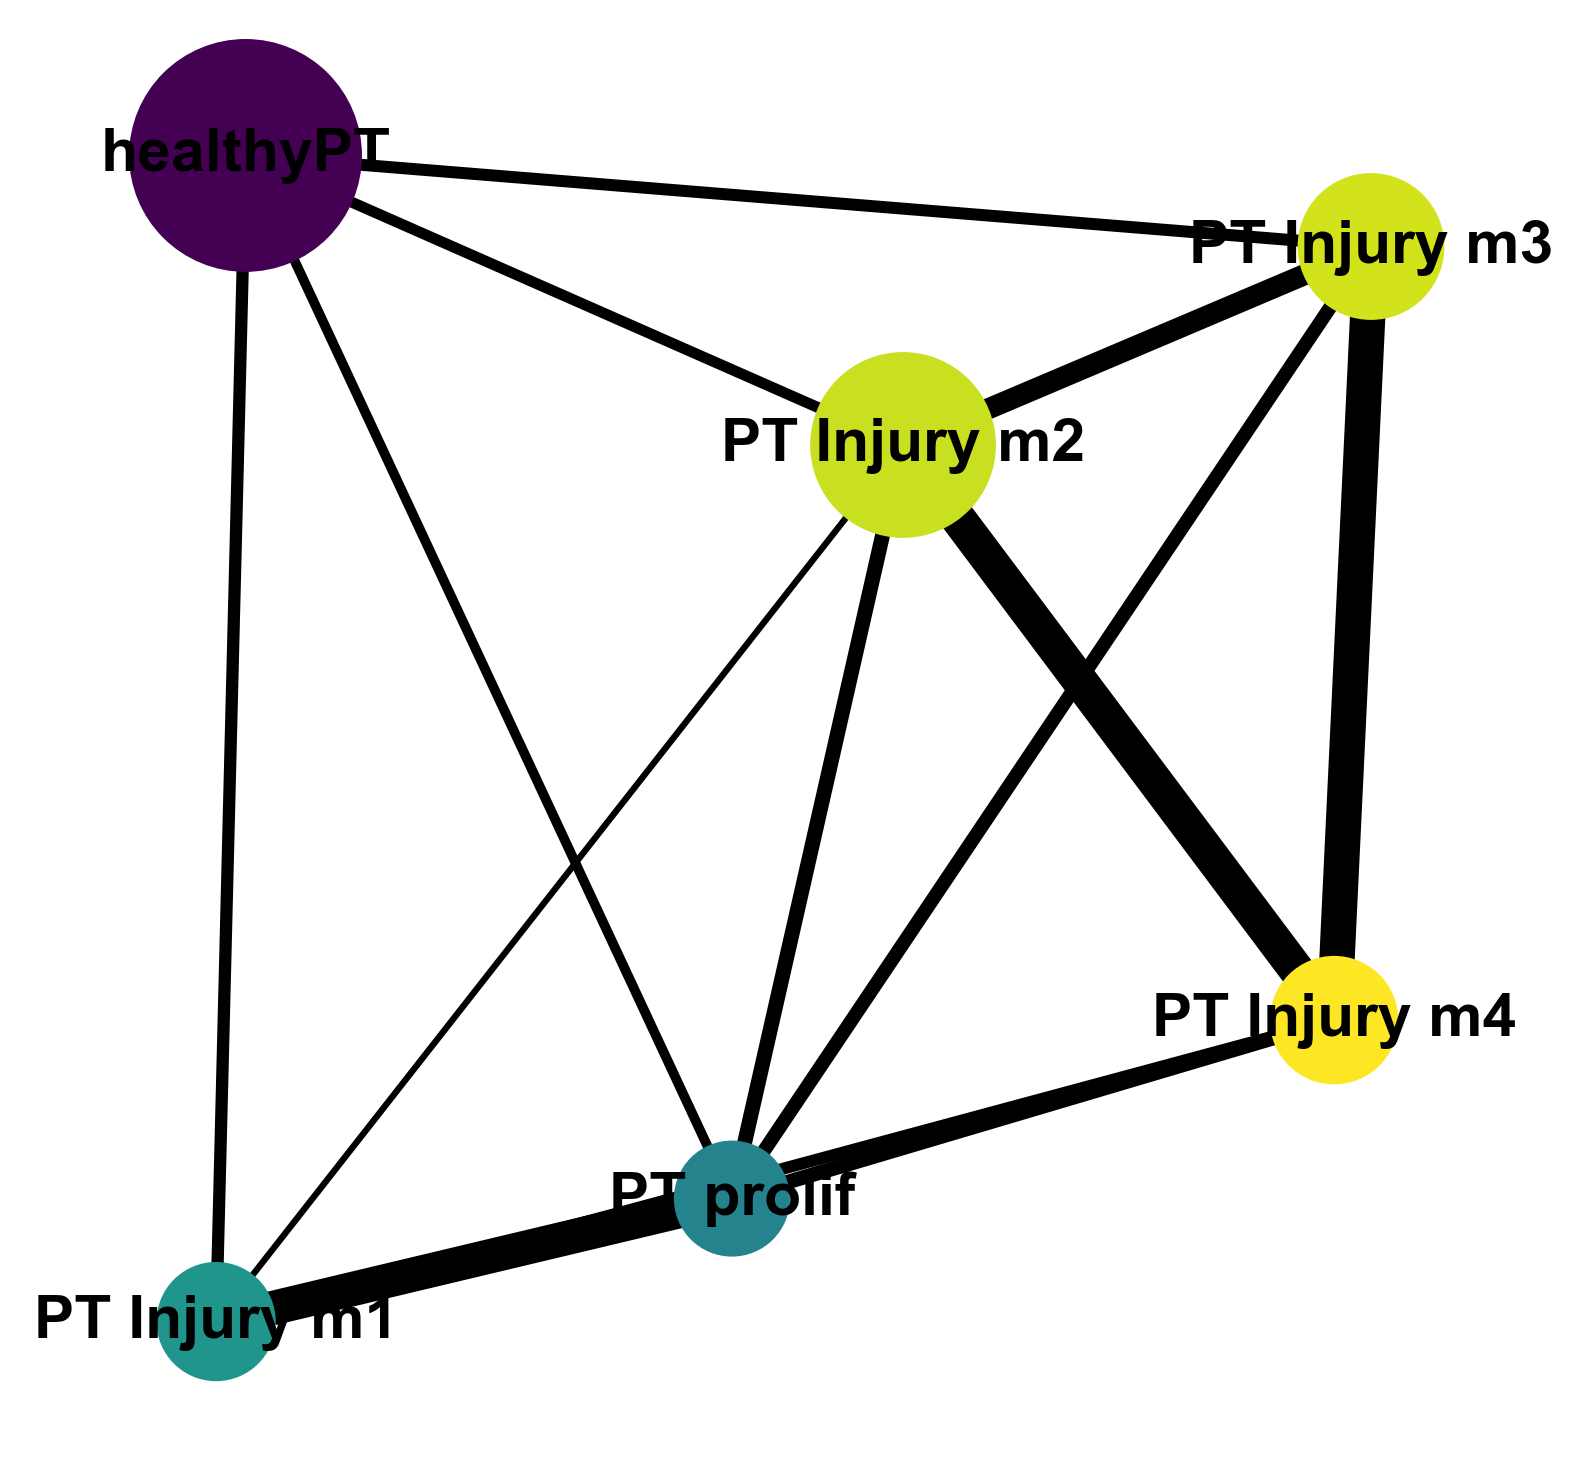

In [33]:
import scanpy as sc
import matplotlib.pyplot as plt
import os

os.chdir(r'D:\R_Ordner\KTx Daten')

adata_pt = sc.read_h5ad("D:/R_Ordner/KTx Daten/Ktx Objekte final/Maus/pt_mouse.h5ad")

healthy_pt_clusters = ['PT S1', 'PT S2', 'PT S3', 'PT S3 med.']
adata_pt.obs['largersubct'] = adata_pt.obs['celltype_to_plot'].apply(
    lambda x: 'healthyPT' if x in healthy_pt_clusters else x
)
adata_pt.obs['largersubct'] = adata_pt.obs['largersubct'].astype('category')

print(adata_pt.obs['largersubct'].unique())

sc.pp.highly_variable_genes(adata_pt, flavor="seurat", n_top_genes=500)
sc.tl.pca(adata_pt, mask_var="highly_variable")
sc.pp.neighbors(adata_pt, n_pcs=30)
sc.tl.diffmap(adata_pt)
# adapt to umap architecture
root_cells = adata_pt.obs[adata_pt.obs['celltype_to_plot'] == 'PT S3 med.'].index
adata_pt = adata_pt[root_cells.tolist() + [c for c in adata_pt.obs.index if c not in root_cells], :].copy()
adata_pt.uns['iroot'] = 0  

sc.tl.paga(adata_pt, groups='largersubct')
sc.tl.dpt(adata_pt)

sc.set_figure_params(figsize=(5, 5), dpi=170)

ax = sc.pl.paga(
    adata_pt,
    color='dpt_pseudotime',
    node_size_scale=5,
    edge_width_scale=1,
    threshold=0.15,
    cmap='viridis',
    frameon=False,
    labels=None,
    show=False  
)


for cax in ax.figure.axes:
    if cax != ax:
        cax.remove()

plt.savefig("PT_plot_no_labels_no_legend.png", dpi=170, bbox_inches="tight")
plt.show()